# Step 1: Import Required Libraries

In this step, Import all the essential Python libraries for data analysis and machine learning.  
- **pandas** for handling tabular data  
- **numpy** for numerical operations  
- **matplotlib** and **seaborn** for visualization  
- **scikit-learn** for preprocessing, feature engineering, and modeling  



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load the Titanic Dataset

Here, Load the Titanic dataset into pandas DataFrames.  
- The **train.csv** file contains labeled data with survival outcomes.  
- The **test.csv** file contains unseen data used for predictions.  


In [6]:
# Adjust file paths if your CSVs are stored elsewhere
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3: Exploratory Data Analysis (EDA)

In this step, Explore the dataset to understand:  
- The number of rows and columns  
- Data types of each column  
- Missing values  
- Distribution of key features such as age, sex, and passenger class  




In [8]:
# General information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

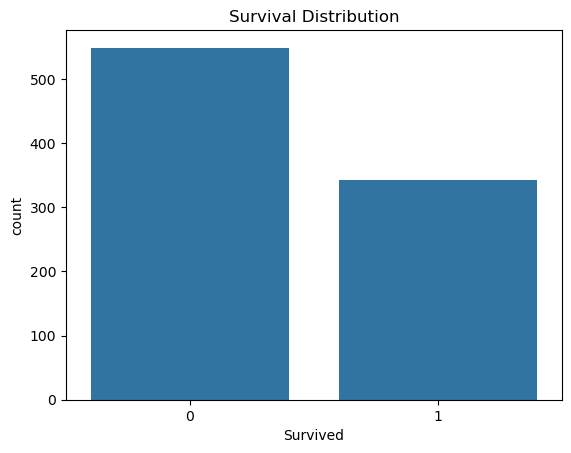

In [11]:
# Visualize survival counts
sns.countplot(data=train_data, x="Survived")
plt.title("Survival Distribution")
plt.show()

# Step 4: Data Cleaning and Feature Engineering

- Fill missing **Age** values with the median.  
- Fill missing **Embarked** values with the mode.  
- Drop columns like **Cabin** and **Ticket** due to high missing values or low predictive power.  
- Encode categorical features such as **Sex** and **Embarked** into numerical values.  
- Create new features like **FamilySize** from `SibSp` and `Parch`.


In [13]:
# Drop unhelpful columns
train_data = train_data.drop(columns=["Cabin", "Ticket"], errors="ignore")
test_data = test_data.drop(columns=["Cabin", "Ticket"], errors="ignore")

# Handle missing values
imputer_median = SimpleImputer(strategy="median")
train_data["Age"] = imputer_median.fit_transform(train_data[["Age"]])
test_data["Age"] = imputer_median.transform(test_data[["Age"]])

train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])

# Encode categorical variables
label = LabelEncoder()
train_data["Sex"] = label.fit_transform(train_data["Sex"])
test_data["Sex"] = label.transform(test_data["Sex"])

train_data["Embarked"] = label.fit_transform(train_data["Embarked"])
test_data["Embarked"] = label.transform(test_data["Embarked"])

# Feature engineering: Family size
for dataset in [train_data, test_data]:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


# Step 5: Train-Validation Split

To evaluate the model properly, Split the training data into:  
- **X_train, X_valid**: input features for training and validation  
- **y_train, y_valid**: survival labels for training and validation  



In [15]:
X = train_data.drop(columns=["Survived", "Name", "PassengerId"])
y = train_data["Survived"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 6: Train the Random Forest Classifier

We choose **Random Forest Classifier** for prediction because:  
- It handles categorical and numerical features well  
- It is robust to missing data  
- It usually performs strongly with minimal hyperparameter tuning  

The model is trained on the training data and evaluated on the validation data.


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Step 7: Generate Predictions and Submission File

In [24]:
X_test = test_data.drop(columns=["Name", "PassengerId"])
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_preds
})

submission.to_csv("submission.csv", index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
